# CCT College Dublin

## Assessment Cover Page

**Module Title**: Machine Learning for AI  
**Assessment Title**: ML_CA1  
**Lecturer Name**: David McQuaid  
**Student Full Name**: Ingrid Menezes Castro  
**Student Number**: 2020341  
**Assessment Due Date**: 22/04/2024  
**Date of Submission**: 22/04/2024  

-------------

## Declaration

<div style="border: 1px solid black; padding: 10px;">
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
</div>

## Imports

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# EDA
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Kfold and Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Accuracy Score, Confusion Matrix and Classification Report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Train Test Split
from sklearn.model_selection import train_test_split

# Improvements
from sklearn.model_selection import GridSearchCV

## Reading CSV

In [2]:
df = pd.read_csv("log2.csv")

## Structure of the Dataset

In [3]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


## Data Understanding

- Action is the Dependent Variable, while the others columns are independent variables;
- The dataset has 65k+ rows and 12 columns;
- No null values;
- 8k+ duplicated rows (that weren't dropped because some info or pattern can be lost with it);

In [4]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [5]:
df['Elapsed Time (sec)'].max()

10824

In [6]:
df.shape

(65532, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [8]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

In [9]:
df.duplicated().sum() 

8362

In [10]:
#df.drop_duplicates(inplace=True) 

In [11]:
df.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
Action                  object
dtype: object

In [12]:
df.groupby("Action").size()

Action
allow         37640
deny          14987
drop          12851
reset-both       54
dtype: int64

## Looking for outliers

Below we have the original values of the dataframe for the numerical values.

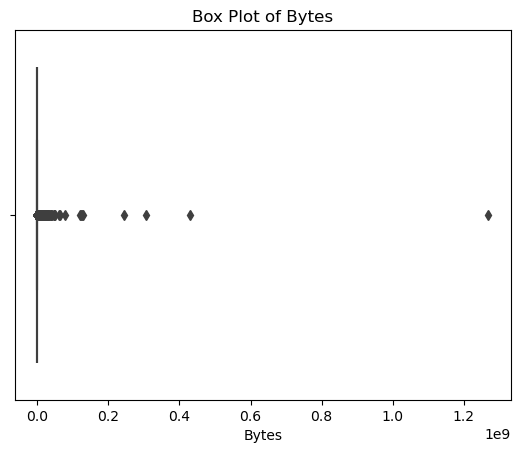

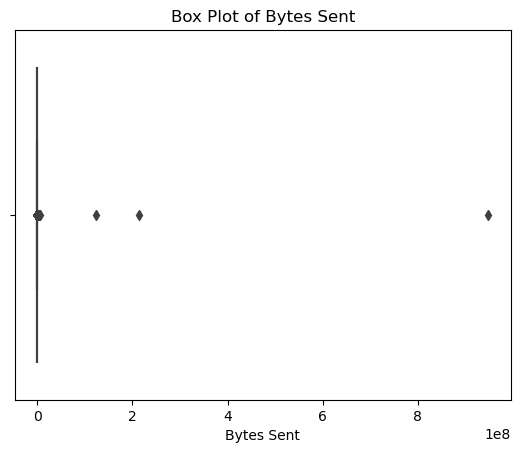

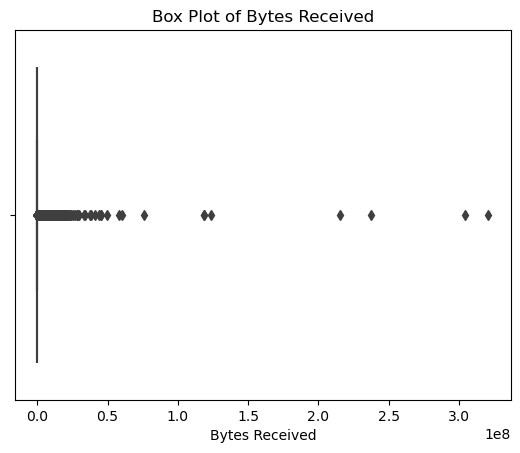

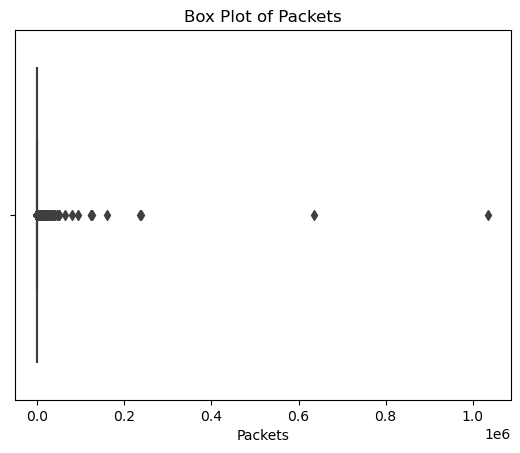

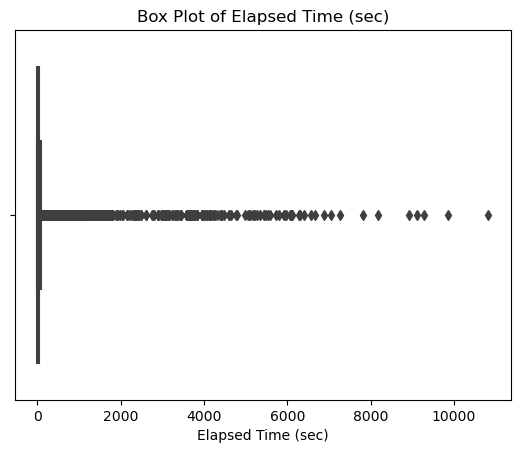

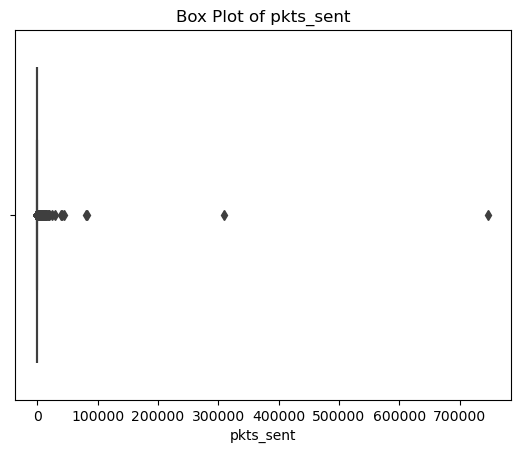

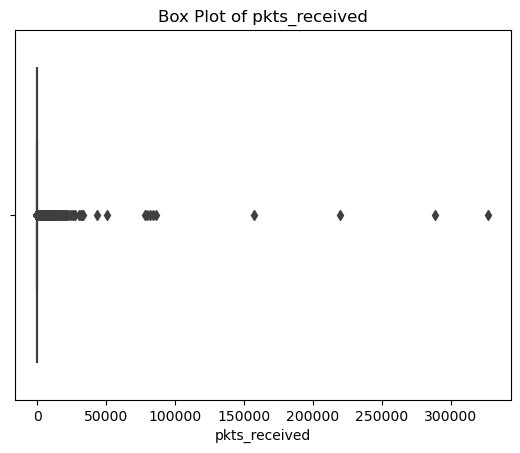

In [13]:
numerical_columns = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

for column in numerical_columns:
    sns.boxplot(x=column, data=df)
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

## Data Skewness

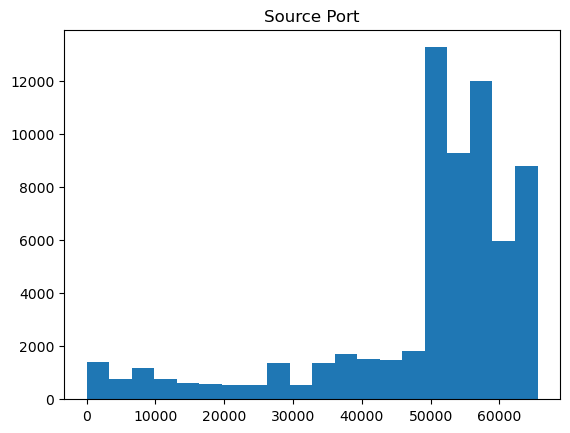

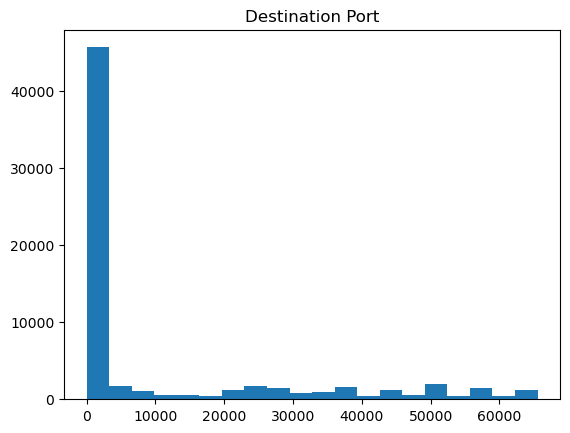

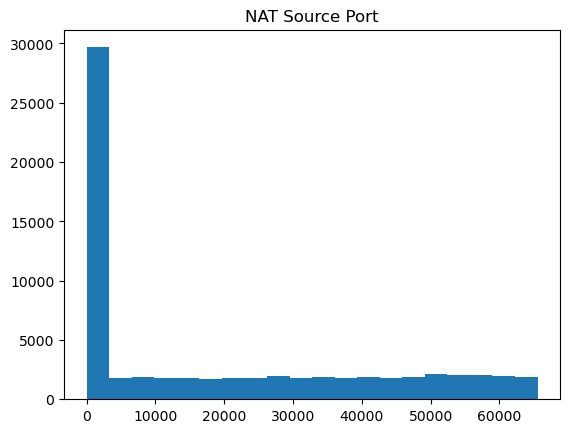

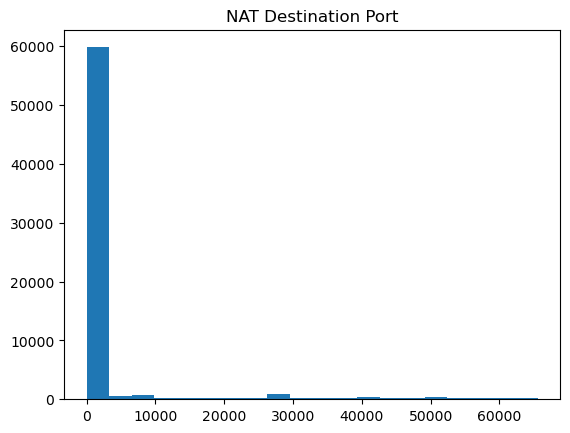

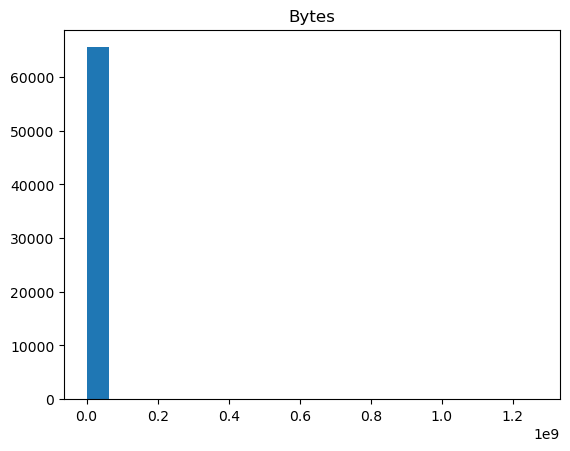

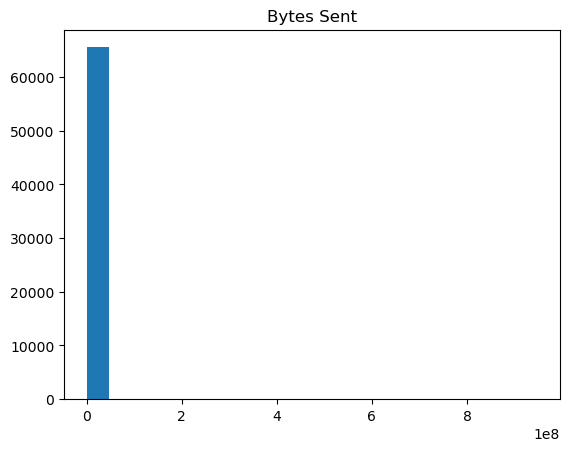

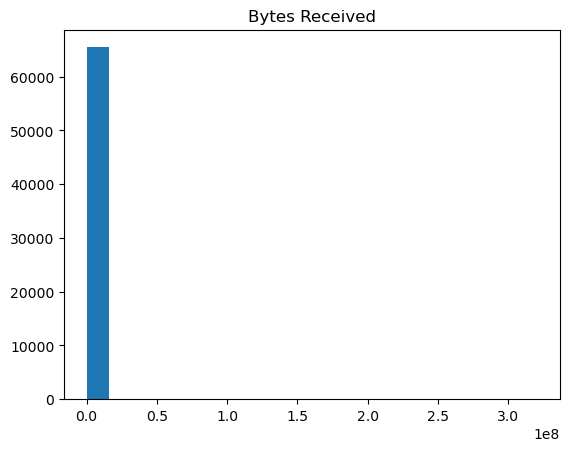

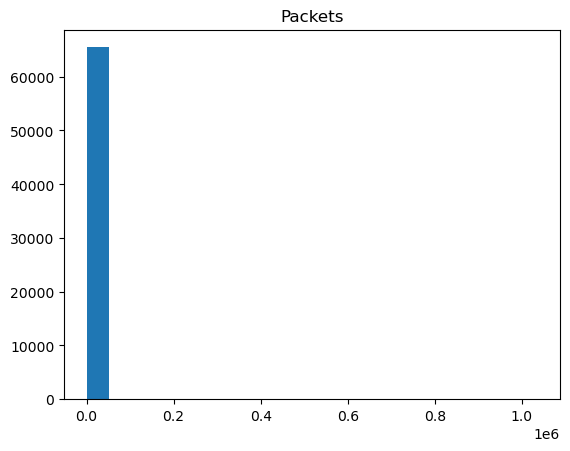

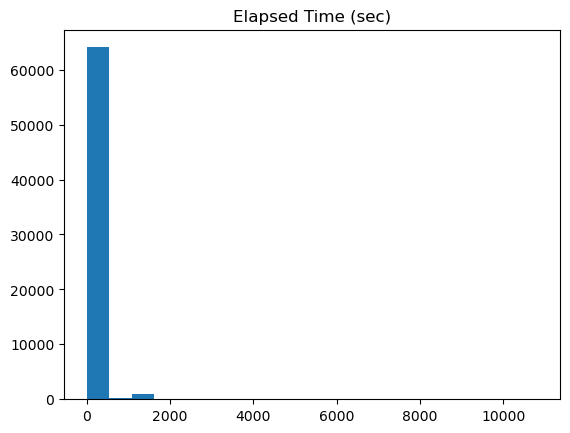

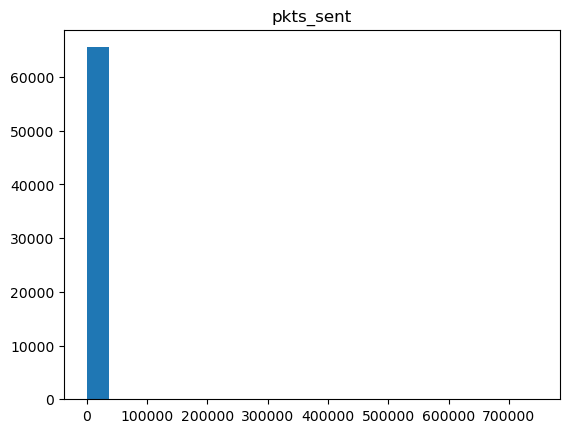

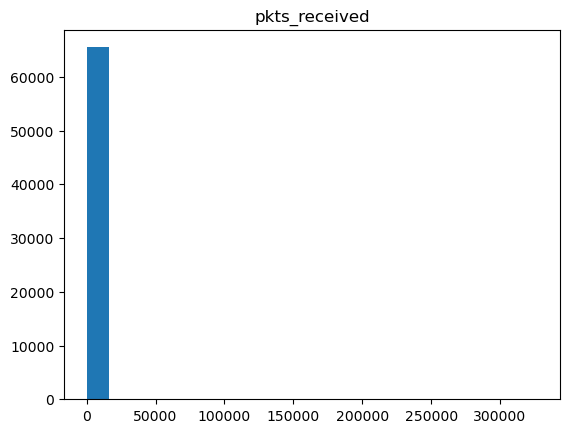

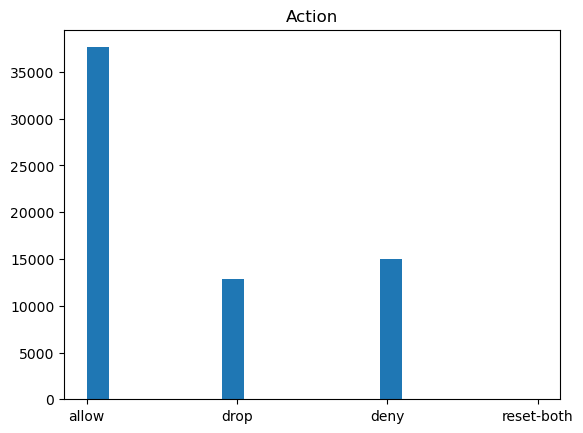

In [14]:
df = pd.DataFrame(df)

for column in df.columns:
    plt.hist(df[column], bins=20)
    plt.title(column)
    plt.show()

# Z-score or IQR for removing Outliers

Here we first select only numerical columns for the data cleaning. I had done beforehand a very slight manual removal of outliers just by visualisation of the data points onto the box plots, but decided to go for the z-score standardisation. 

When I observed how skewed that data is, however, I changed my approach to IQR InterQuartile Range, that is said to be more appropriate for skewed distributions. 

I reversed this approach though because I thought that was too much data loss (15k rows), which can be very bad when treating data. So even with the skewed data, the more conservative approach (z-score) was the one chosen to taken care of the outliers. 

### Z-Score

Below the code you can see that only 1.5k rows were removed with this approach. The result can be seen in the next boxplots.

In [15]:
numerical_cols = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

z_scores = stats.zscore(df[numerical_cols])
threshold = 3
outlier_rows = (np.abs(z_scores) < threshold).all(axis=1)
df_clean = df[outlier_rows]

print("Original shape:", df.shape)
print("Shape after removing outliers:", df_clean.shape)

Original shape: (65532, 12)
Shape after removing outliers: (64125, 12)


## Box plots of the df_clean dataset

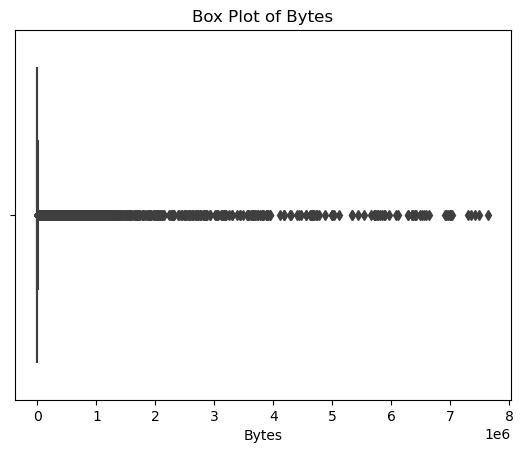

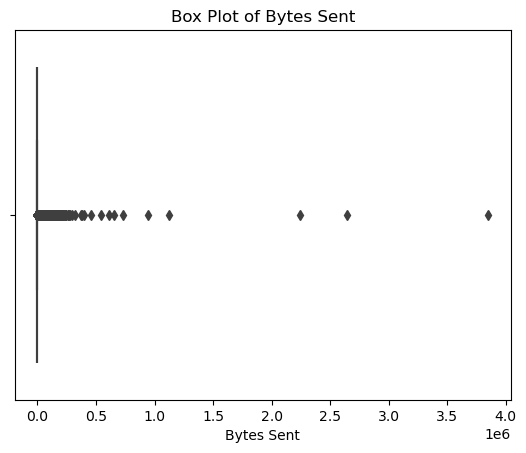

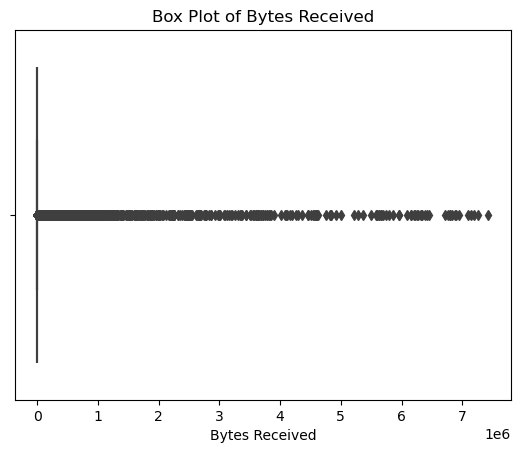

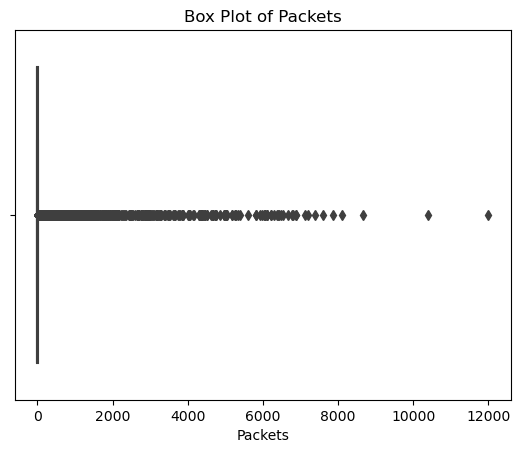

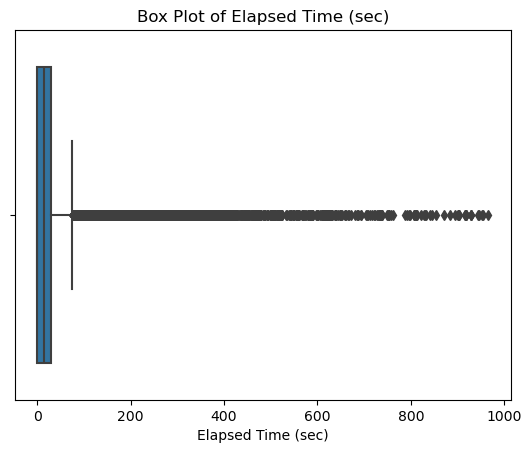

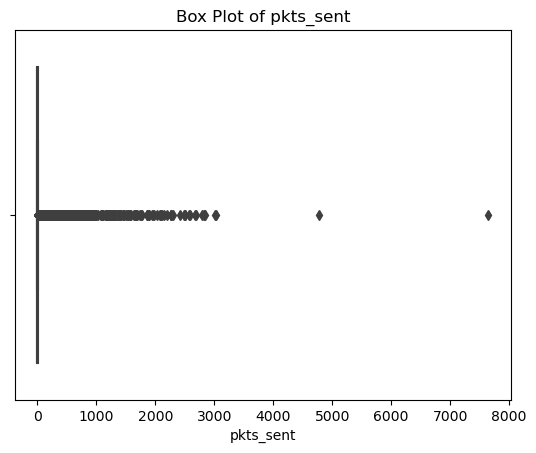

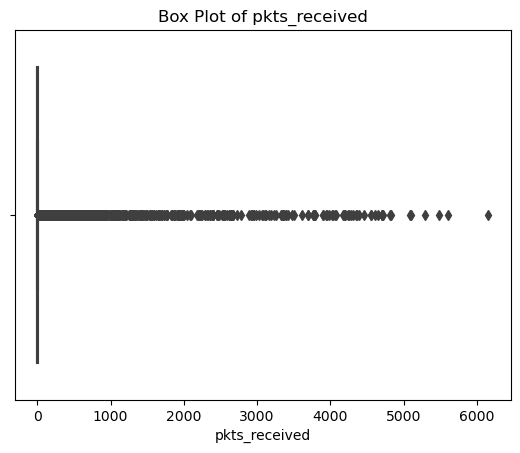

In [16]:
numerical_columns = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

for column in numerical_columns:
    sns.boxplot(x=column, data=df_clean)
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

In [17]:
df_clean.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,64125.000000,64125.000000,64125.000000,64125.000000,6.412500e+04,6.412500e+04,6.412500e+04,64125.000000,64125.000000,64125.000000,64125.000000
mean,49550.534690,10300.772507,18956.519407,2220.959595,2.167909e+04,1.647328e+03,2.003176e+04,28.015345,31.679423,11.160078,16.855267
std,15184.459776,18293.929241,21929.336431,8789.335595,2.384828e+05,2.358583e+04,2.310465e+05,246.098814,67.582683,88.819675,165.379159
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000,0.000000,1.000000,0.000000
25%,49242.000000,53.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000,0.000000,1.000000,0.000000
50%,53864.000000,445.000000,7882.000000,53.000000,1.680000e+02,8.800000e+01,7.400000e+01,2.000000,15.000000,1.000000,1.000000
75%,58638.000000,11392.000000,37799.000000,443.000000,7.330000e+02,1.920000e+02,4.170000e+02,5.000000,30.000000,3.000000,2.000000
max,65534.000000,65504.000000,65535.000000,65387.000000,7.644833e+06,3.850148e+06,7.429337e+06,11999.000000,966.000000,7647.000000,6155.000000


## Treating Bytes

We can see in the Boxplot below that there are 4 data points that are outliers and can affect our results, so we will drop all the values above a certain range (200 million bytes). This will prevent that the outlining values influence any of our predictions. We should do this with all the numerical columns

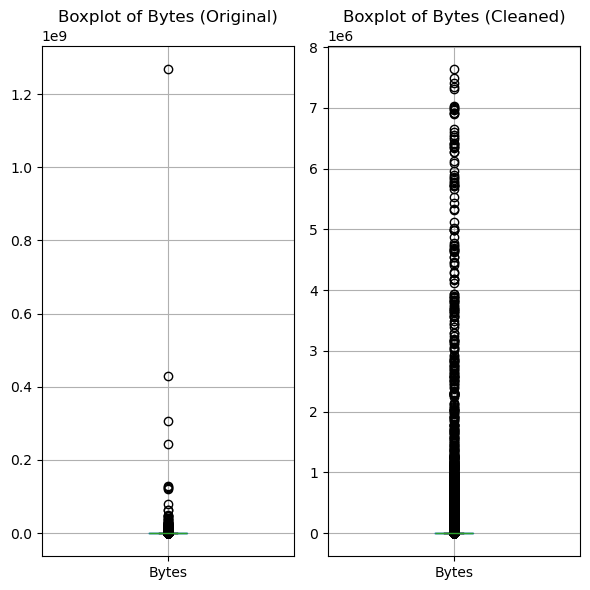

In [18]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
df.boxplot(column='Bytes')
plt.title('Boxplot of Bytes (Original)')

plt.subplot(1, 2, 2)
df_clean.boxplot(column='Bytes')
plt.title('Boxplot of Bytes (Cleaned)')

plt.tight_layout()
plt.show()

------------------------------------------

## Treating Bytes Sent

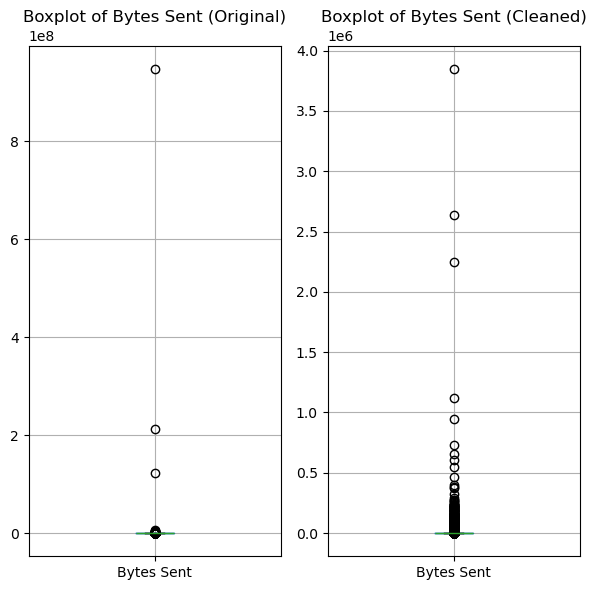

In [19]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
df.boxplot(column='Bytes Sent')
plt.title('Boxplot of Bytes Sent (Original)')

plt.subplot(1, 2, 2)
df_clean.boxplot(column='Bytes Sent')
plt.title('Boxplot of Bytes Sent (Cleaned)')

plt.tight_layout()
plt.show()

----------------

##  Treating Bytes Received

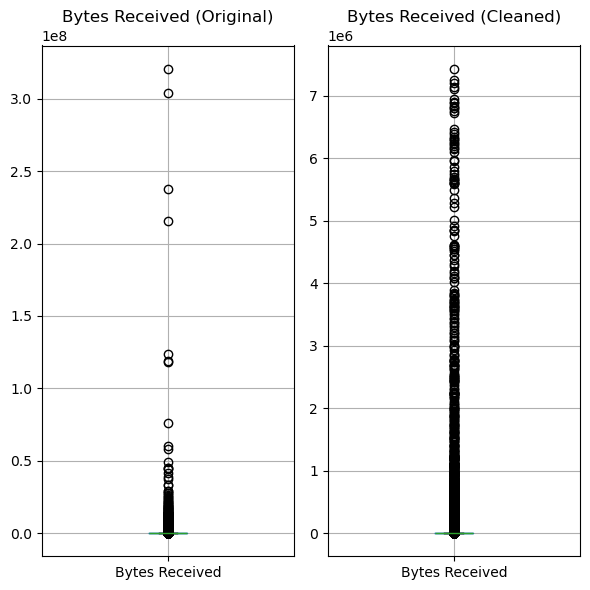

In [20]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
df.boxplot(column='Bytes Received')
plt.title('Bytes Received (Original)')

plt.subplot(1, 2, 2)
df_clean.boxplot(column='Bytes Received')
plt.title('Bytes Received (Cleaned)')

plt.tight_layout()
plt.show()

--------------------

## Treating Packets

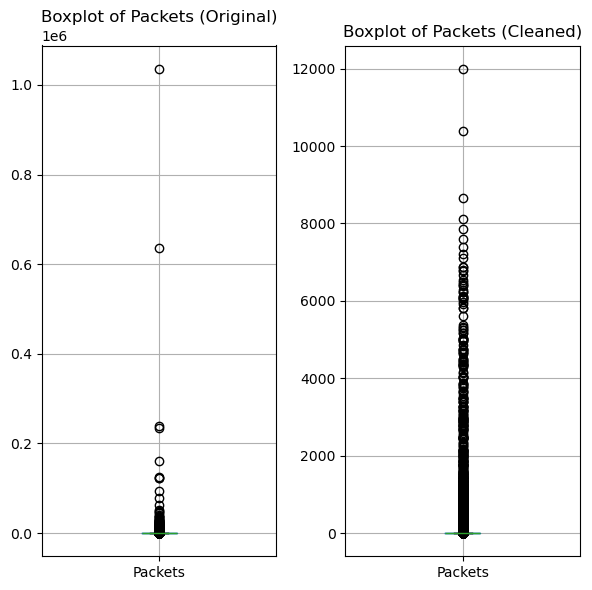

In [21]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
df.boxplot(column='Packets')
plt.title('Boxplot of Packets (Original)')

plt.subplot(1, 2, 2)
df_clean.boxplot(column='Packets')
plt.title('Boxplot of Packets (Cleaned)')

plt.tight_layout()
plt.show()

----------------

## Treating Elapsed Time (sec)

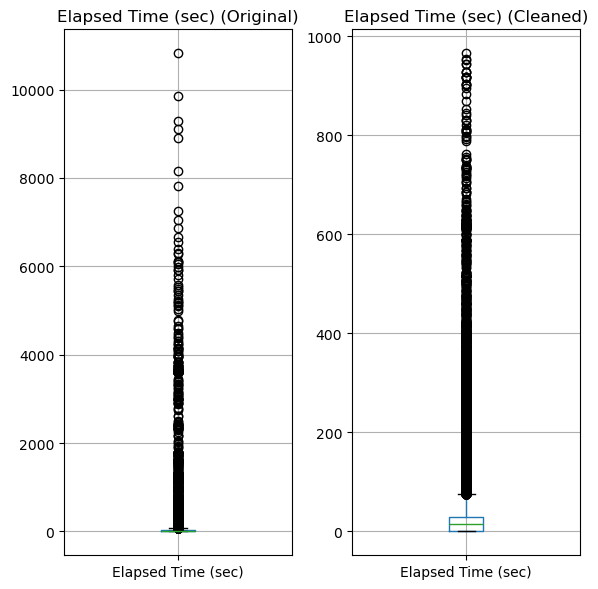

In [22]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
df.boxplot(column='Elapsed Time (sec)')
plt.title('Elapsed Time (sec) (Original)')

plt.subplot(1, 2, 2)
df_clean.boxplot(column='Elapsed Time (sec)')
plt.title('Elapsed Time (sec) (Cleaned)')

plt.tight_layout()
plt.show()

--------------

## Treating pkts_sent

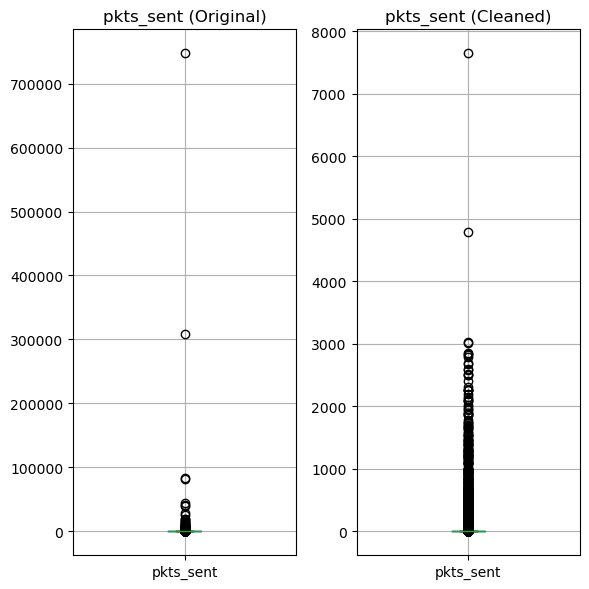

In [23]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
df.boxplot(column='pkts_sent')
plt.title('pkts_sent (Original)')

plt.subplot(1, 2, 2)
df_clean.boxplot(column='pkts_sent')
plt.title('pkts_sent (Cleaned)')

plt.tight_layout()
plt.show()

-----------

## Treating pkts_received

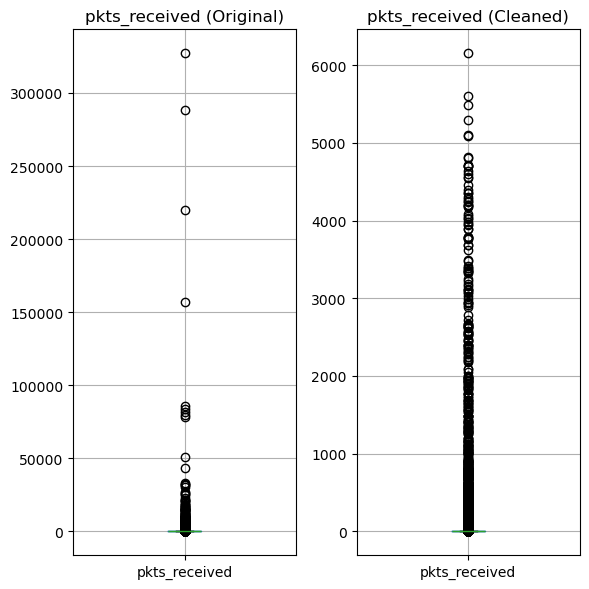

In [24]:
plt.figure(figsize=(6, 6))

plt.subplot(1, 2, 1)
df.boxplot(column='pkts_received')
plt.title('pkts_received (Original)')

plt.subplot(1, 2, 2)
df_clean.boxplot(column='pkts_received')
plt.title('pkts_received (Cleaned)')

plt.tight_layout()
plt.show()

-----------

# Visualisations

This exploratory data analysis serves the purpose of giving us a better visualisation of values. Some visualisations were made above, but this is just some extra.

### Bar Plots

Source Port
58638    840
27005    513
443      273
49418    210
0        173
3478     105
26900    102
5588      87
42298     84
45941     77
Name: count, dtype: int64


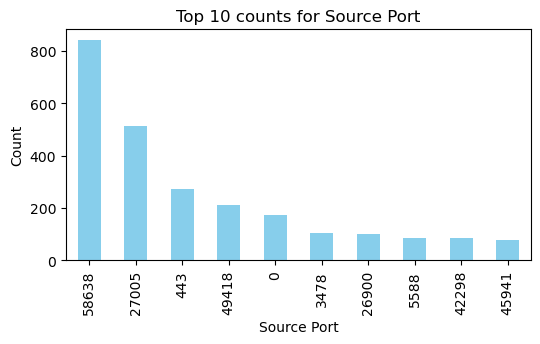

Destination Port
53       15414
445      12891
443      11460
80        3969
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
Name: count, dtype: int64


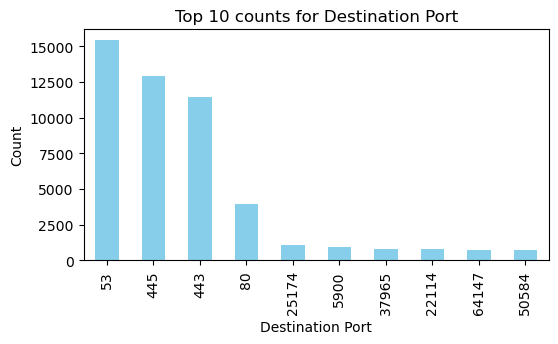

NAT Source Port
0        28432
58638       51
50116       15
57880        5
60868        5
57596        5
63585        4
45721        4
57757        4
49244        4
Name: count, dtype: int64


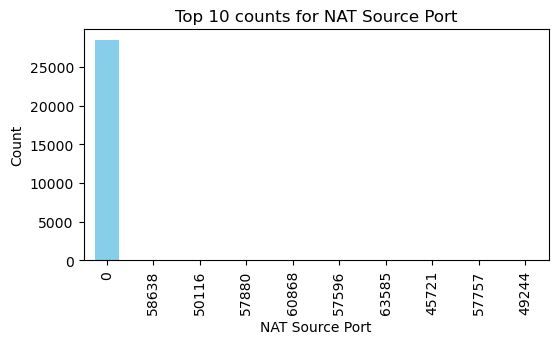

NAT Destination Port
0        28432
53       15094
443      11454
80        3962
27015      234
27017      160
123        156
3389       155
7000        94
27016       86
Name: count, dtype: int64


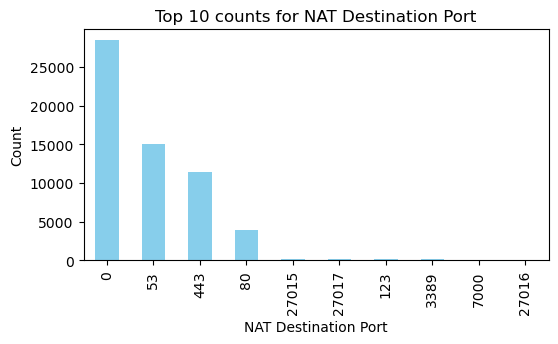

In [25]:
def bar_plot(df, categorical_columns):
    for column in categorical_columns:
        counts = df[column].value_counts().head(10)
        print(df_clean[column].value_counts()[0:10])
        plt.figure(figsize=(6, 3))
        counts.plot(kind='bar', color='skyblue')
        plt.title(f'Top 10 counts for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

bar_plot(df_clean, ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port'])

After this visualisation I decided to drop the column: NAT Source Port.

In [26]:
df_clean = df_clean.drop(columns=['NAT Source Port'])

### HeatMap for correlation

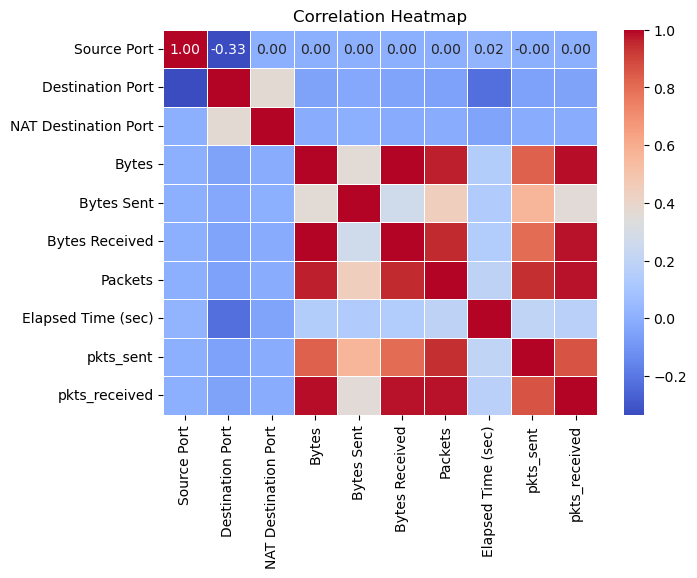

In [27]:
columns = ['Source Port', 'Destination Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

corr = df_clean[columns].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

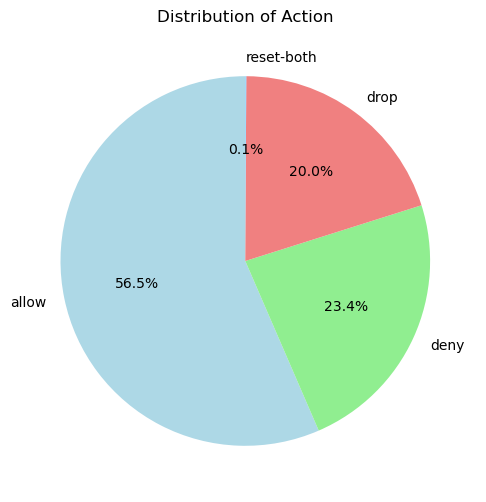

In [46]:
plt.figure(figsize=(8, 6))

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

df_clean['Action'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Action')
plt.ylabel('')
plt.show()

-------------

## Prep for models

We will slice the data here and prep the variables to be used in the models we want.

In [33]:
array = df_clean.values
array

array([[57222, 53, 53, ..., 1, 1, 'allow'],
       [56258, 3389, 3389, ..., 10, 9, 'allow'],
       [50553, 3389, 3389, ..., 8, 7, 'allow'],
       ...,
       [54871, 445, 0, ..., 1, 0, 'drop'],
       [54870, 445, 0, ..., 1, 0, 'drop'],
       [54867, 445, 0, ..., 1, 0, 'drop']], dtype=object)

In [34]:
X = array[:, 0:10]
y = array[:, 10]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

# Models



## KNN

According to GeekForGeeks: "KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection." ([1] GeeksforGeeks, 2018)

This was an algorithm I thought would be useful for this kind of problem because it has pattern recognition and can predict what the incoming traffic would be based on its neighbors. The distribution of the data doesn't affect this algorithm, as well as there are no underlying assumptions about the data like with the Gaussian Distribution ([1] GeeksForGeeks, 2018).

I did try the Gaussian Distribution as a possible model but the results were inferior to the ones showed by the 3 algorithms I kept (77% accuracy, while KNN and other performed to 99% accuracy). 

## Decision Trees

"It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label." ([3] GeeksForGeeks, 2017)

Decision Tree is a model that works well with data even if it is not cleaned properly and works similarly to the Random Forest, selecting the feature that best splits the data into homogeneous subsets. The downside to Decision Trees is that they tend to overfit the training data, which can lead to poor generalization performance on data that has not been touched.

I chose this algorithm to see how the "simplified" version of the Random Forest would perform, since I thouoght from the start Random Forest would be my chosen algorithm and the most accurate of them all. It turned out to be true.

## Random Forest

"Random Forests are particularly well-suited for handling large and complex datasets, dealing with high-dimensional feature spaces, and providing insights into feature importance. This algorithm’s ability to maintain high predictive accuracy while minimizing overfitting makes it a popular choice across various domains." ([2] GeeksForGeeks, 2020).

Random Forests are the combination of multiple decision trees. It has Feature Selection embedded in it (I have tried using RFE but found it not very helpful for Random Forests) and can be helpful in this sort of Dataset, that has many features to be taken in consideration. It is also less prone to Overfitting, a phenomenon common within Decistion Trees because it trains multiple decision trees on random subsets of the data and take the average of their predictions.

From the get go, according to researches this was one of the best algorithms I found for this sort of problem, since there were many features 

## Implementation of Models

In [36]:
models = []

models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))

In [37]:
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.990585 (0.000931)
DT: 0.997602 (0.000470)
RF: 0.997875 (0.000448)


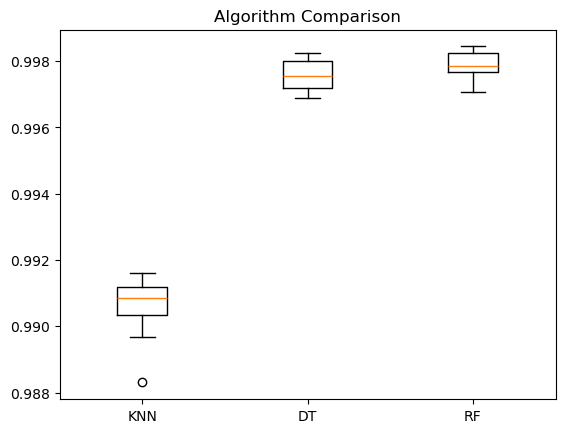

In [38]:
pyplot.boxplot(results, labels = names)
pyplot.title("Algorithm Comparison")
pyplot.show()

In [39]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9977387914230019
[[7224    4    0    0]
 [   0 2962    5    1]
 [   0   15 2605    0]
 [   0    4    0    5]]


In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7228
        deny       0.99      1.00      1.00      2968
        drop       1.00      0.99      1.00      2620
  reset-both       0.83      0.56      0.67         9

    accuracy                           1.00     12825
   macro avg       0.96      0.89      0.91     12825
weighted avg       1.00      1.00      1.00     12825



## How to Improve Random Forest Model

We will tune the model with HyperParameters, as seen on Kunaal Naik video (Naik, 2020). The code was extracted from his tutorial, posted on Youtube.

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2,4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


Now we can see what the estimator will give us. This process takes a while.

In [42]:
rf_model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [43]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 17}

In [55]:
print (f'Train Accuracy: {rf_Grid.score(X_train,y_train):.5f}')
print (f'Test Accuracy: {rf_Grid.score(X_test,y_test):.5f}')

if train_accuracy > test_accuracy:
    print("The model may be overfitting as it performs better on the training set than on the test set.")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting as it performs better on the test set than on the training set.")
else:
    print("The model performs similarly on both the training and test sets.")


Train Accuracy: 0.99797
Test Accuracy: 0.99860
The model may be underfitting as it performs better on the test set than on the training set.


In [56]:
print("Classification Report - Test Data:")
print(classification_report(y_test, rf_Grid.predict(X_test)))

print("Confusion Matrix - Test Data:")
print(confusion_matrix(y_test, rf_Grid.predict(X_test)))

Classification Report - Test Data:
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7228
        deny       1.00      1.00      1.00      2968
        drop       1.00      1.00      1.00      2620
  reset-both       1.00      0.33      0.50         9

    accuracy                           1.00     12825
   macro avg       1.00      0.83      0.87     12825
weighted avg       1.00      1.00      1.00     12825

Confusion Matrix - Test Data:
[[7228    0    0    0]
 [   5 2956    7    0]
 [   0    0 2620    0]
 [   0    6    0    3]]


--------------

According to Madhavan Vivekanandan (Vivekanandan, 2023), "Random forests have hyperparameters that can be tuned to improve the performance of the model." 

Those parameters are:

Number of trees (n_estimators),
Max features (max_features,)
Min samples split (min_samples_spli,t)
Min samples leaf (min_samples_le,af)
Max depth (max_de,pth)
Randomness (random_s.tate)ults.sults.

For this approach we used the Grid search, that consists of a "brute-force approach that tries all possible combinations of hyperparameter values". With that we were able to upgrade from 0.99773 to 0.99860, a 0.0873% improvement for an algorithm that already was very good.

In [53]:

if train_accuracy > test_accuracy:
    print("The model may be overfitting as it performs better on the training set than on the test set.")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting as it performs better on the test set than on the training set.")
else:
    print("The model performs similarly on both the training and test sets.")

Train Accuracy: 0.998
Test Accuracy: 0.999
The model may be underfitting as it performs better on the test set than on the training set.
